<a href="https://colab.research.google.com/github/MStamirski/News/blob/main/SentenceTransform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd
import random as rnd

# Read prepared dataset

In [ ]:
allnews = pd.read_csv("drive/MyDrive/Colab_Notebooks/SDA_upskill/News/data/AllNews.csv")
allnews

,real,news
0,1,kandi burruss explodes rape accusation real ho...
1,1,people choice award 2018 best red carpet look
2,1,sophia bush send sweet birthday message one tr...
3,1,colombian singer maluma spark rumour inappropr...
4,1,gossip girl 10 year later upper east siders sh...
...,...,...
139657,1,fully commit nato back new us approach afghani...
139658,1,lexisnexis withdraw two product chinese market
139659,1,minsk cultural hub become authority
139660,1,vatican upbeat possibility pope francis visit ...


# Features based on vectors constructed by model SentenceTransformer

In [ ]:
!pip install -U sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer
model_sentrans = SentenceTransformer('all-MiniLM-L6-v2')

In [ ]:
X_matrix = model_sentrans.encode(allnews['news'], show_progress_bar=True, convert_to_numpy=True)

Batches:   0%|          | 0/4365 [00:00<?, ?it/s]

In [ ]:
X_matrix.shape

(139662, 384)

In [ ]:
X_matrix

array([[-0.06199614, -0.04289573, -0.01530565, ...,  0.01126081,
        -0.0128144 , -0.01081988],
       [-0.08747299,  0.01583917, -0.00280304, ..., -0.04382647,
        -0.0014506 ,  0.09105194],
       [-0.05400676, -0.07595815,  0.06901807, ..., -0.01545229,
        -0.06042938, -0.09684711],
       ...,
       [ 0.10546493,  0.01751536, -0.01296209, ..., -0.01662026,
         0.0617567 , -0.08887193],
       [ 0.03876783, -0.00643933,  0.00632192, ..., -0.08159885,
        -0.01975142, -0.08951832],
       [-0.00715282,  0.01453741, -0.10237645, ..., -0.07948569,
        -0.05018834, -0.010008  ]], dtype=float32)

In [ ]:
features = ['feat'+str(i+1) for i in range(len(X_matrix[0]))]
X = pd.DataFrame(data=X_matrix, columns=features)
X

,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,...,feat375,feat376,feat377,feat378,feat379,feat380,feat381,feat382,feat383,feat384
0,-0.061996,-0.042896,-0.015306,0.070030,0.048771,0.027527,0.019399,-0.069034,-0.007712,-0.022029,...,0.031787,0.005278,0.039628,0.052072,-0.009688,0.012679,0.051608,0.011261,-0.012814,-0.010820
1,-0.087473,0.015839,-0.002803,-0.005971,0.015988,0.096913,0.065061,-0.008517,-0.016335,-0.035012,...,0.035634,-0.084484,-0.039872,-0.014519,0.077165,0.052627,0.062203,-0.043826,-0.001451,0.091052
2,-0.054007,-0.075958,0.069018,0.020588,-0.002013,-0.002309,0.024125,-0.023060,-0.012680,-0.011706,...,-0.018464,0.010650,-0.014505,-0.060406,0.077907,0.066160,0.023197,-0.015452,-0.060429,-0.096847
3,-0.018324,-0.042300,0.012398,-0.020198,-0.057633,0.051778,0.040557,0.035006,0.043505,-0.064807,...,-0.094950,-0.021456,-0.081562,0.046101,0.050859,-0.058188,0.051845,-0.092362,-0.028255,-0.063820
4,-0.052895,-0.082876,0.079771,-0.034636,0.058511,0.022344,0.008728,0.003240,0.017817,-0.076545,...,-0.021072,-0.003319,0.004749,0.049344,-0.017660,0.074058,0.037879,-0.082261,-0.049489,-0.033391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139657,-0.042041,0.017048,0.031729,0.001947,-0.027307,-0.020020,-0.067829,-0.062296,-0.046027,0.039939,...,0.085275,0.077733,0.047215,-0.021130,-0.025005,-0.008210,-0.016571,-0.074725,0.028247,-0.024076
139658,-0.004914,-0.020960,0.040961,-0.027712,0.017017,0.049987,0.092078,0.002572,0.016596,-0.067592,...,-0.036900,-0.036450,-0.078411,0.034628,-0.061234,-0.007662,0.014682,-0.057440,0.052703,0.056332
139659,0.105465,0.017515,-0.012962,0.010675,-0.007861,0.067358,-0.004015,-0.043347,0.002382,0.021722,...,0.048130,-0.066217,-0.029552,0.001452,-0.049662,0.044276,-0.048217,-0.016620,0.061757,-0.088872
139660,0.038768,-0.006439,0.006322,0.073279,-0.003624,-0.050868,0.002106,-0.026045,0.026938,-0.095313,...,-0.029317,0.074843,0.020435,0.008710,-0.014511,-0.025964,-0.024715,-0.081599,-0.019751,-0.089518


In [ ]:
y = allnews['real']
y

0         1
1         1
2         1
3         1
4         1
         ..
139657    1
139658    1
139659    1
139660    1
139661    1
Name: real, Length: 139662, dtype: int64

# Prediction using Logistic Regression optimized by Optuna

In [ ]:
def train_val_test_split(X, y, threshold):
  df = pd.concat([y, X], axis=1)

  df_test = df.sample(frac=threshold, random_state=42)
  
  df_train_val = df.drop(df_test.index)
  df_val = df_train_val.sample(frac=threshold, random_state=42)
  
  df_train = df_train_val.drop(df_val.index)
  
  y_test = df_test.iloc[:,0]
  X_test = df_test.iloc[:,1:]

  y_val = df_val.iloc[:,0]
  X_val = df_val.iloc[:,1:]

  y_train = df_train.iloc[:,0]
  X_train = df_train.iloc[:,1:]

  return (X_train, y_train), (X_val, y_val), (X_test, y_test)

In [ ]:
def describe_dataset(title, df):
  string1 = f"{title}: X length: {len(df[0])}, "
  string2 = f"X width: {len(df[0].columns)}, "
  string3 = f"y length: {len(df[1])}, "
  string4 = f"value count {df[1].value_counts(normalize=True).index[0]}: {round(df[1].value_counts(normalize=True)[0],2)}, "
  string5 = f"value count {df[1].value_counts(normalize=True).index[1]}: {round(df[1].value_counts(normalize=True)[1],2)}"
  print(string1 + string2 + string3 + string4 + string5)

In [ ]:
train, val, test = train_val_test_split(X, y, 0.2)
describe_dataset('TRAIN', train)
describe_dataset('VALID', val)
describe_dataset('TEST ', test)

TRAIN: X length: 89384, X width: 384, y length: 89384, value count 1: 0.46, value count 0: 0.54
VALID: X length: 22346, X width: 384, y length: 22346, value count 1: 0.46, value count 0: 0.54
TEST : X length: 27932, X width: 384, y length: 27932, value count 1: 0.45, value count 0: 0.55


In [ ]:
!pip install optuna

In [ ]:
import optuna

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
def best_parameters(study):
  print("\n==============================================")
  print(f"Number of finished trials: {len(study.trials)}")
  print('Best trial:')
  trial = study.best_trial
  print(f"Value: {trial.value}")
  print('  Params: ')
  for key, value in trial.params.items():
    print(f"    {key}: {value}")
  print("==============================================")
  return trial.params

In [ ]:
def model_optimization(trials, objective):
  study = optuna.create_study(direction='maximize')  
  study.optimize(objective, n_trials=trials)
  params = best_parameters(study)
  return params

In [ ]:
def objective(trial):

  logreg_c = trial.suggest_float('logreg_c', 1e-10, 1e10, log=True)

  optuna_model = LogisticRegression(C=logreg_c)
  optuna_model.fit(train[0], train[1])

  pred = optuna_model.predict(val[0])
  f1 = f1_score(val[1], pred)

  return f1

In [ ]:
def predict_test_news(model, test):
  model.fit(train[0], train[1])
  prediction = model.predict(test[0])

  print(f"\nPrecision: {precision_score(test[1], prediction):.2f}")
  print(f"Recall:    {recall_score(test[1], prediction):.2f}")
  print(f'F1:        {f1_score(test[1], prediction):.2f}\n')
  
  cm = confusion_matrix(test[1], prediction)
  cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["FAKE", "REAL"])
  cm_display.plot()
  plt.show()

In [ ]:
params = model_optimization(100, objective)

[I 2023-05-21 20:38:29,347] A new study created in memory with name: no-name-93dc88f3-6796-48ac-bd98-e05adac85adf
[I 2023-05-21 20:38:39,490] Trial 0 finished with value: 0.6479661214499397 and parameters: {'logreg_c': 720959323.7332762}. Best is trial 0 with value: 0.6479661214499397.
[I 2023-05-21 20:38:50,799] Trial 1 finished with value: 0.6491051367475014 and parameters: {'logreg_c': 1.55136658185049}. Best is trial 1 with value: 0.6491051367475014.
[I 2023-05-21 20:38:57,309] Trial 2 finished with value: 0.648482729144811 and parameters: {'logreg_c': 31.057110537560426}. Best is trial 1 with value: 0.6491051367475014.
[I 2023-05-21 20:39:04,409] Trial 3 finished with value: 0.6488039763901834 and parameters: {'logreg_c': 305.96196128358247}. Best is trial 1 with value: 0.6491051367475014.
[I 2023-05-21 20:39:05,449] Trial 4 finished with value: 0.7019459773453384 and parameters: {'logreg_c': 4.610037620438985e-06}. Best is trial 4 with value: 0.7019459773453384.
[I 2023-05-21 20:


Number of finished trials: 100
Best trial:
Value: 0.7105152911604523
  Params: 
    logreg_c: 0.0006468967771678505



Precision: 0.56
Recall:    0.98
F1:        0.72



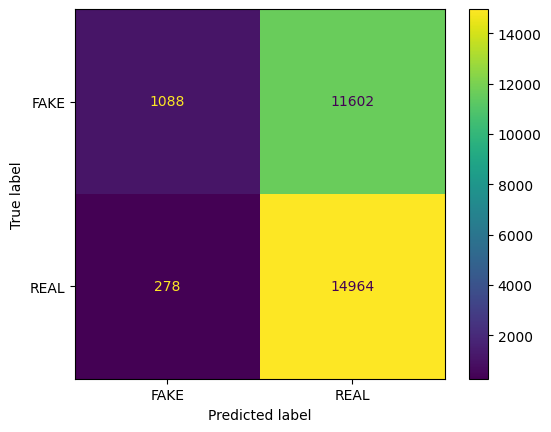

In [ ]:
model_logreg = LogisticRegression(C=params['logreg_c'])
predict_test_news(model_logreg, test)

# Searching for the best threshold 

In [ ]:
from keras.metrics import Precision
from keras.metrics import Recall

In [ ]:
def get_best_threshold(y_val, y_pred):

  thresholds = list(np.arange(0.05, 1.0, 0.05))

  prec = Precision(thresholds = thresholds)
  prec.update_state(y_val, y_pred)
  precisions = prec.result()

  rec = Recall(thresholds = thresholds)
  rec.update_state(y_val, y_pred)
  recalls = rec.result()

  max_F1 = 0
  best_threshold = 0.1
  for precision, recall, threshold in zip(precisions, recalls, thresholds):
    F1 = 2 * (precision * recall) / (precision + recall)
    if F1 > max_F1:
      max_F1 = F1
      best_threshold = threshold

  return best_threshold

In [ ]:
def get_tuned_prediction(y_pred, threshold):
  return np.array([1 if y>= threshold else 0 for y in y_pred])

In [ ]:
def tuned_prediction_test_news(model, val, test):
  model.fit(train[0], train[1])
  pred_val = model.predict_proba(val[0])[:,1]
  threshold = get_best_threshold(val[1], pred_val)
  
  pred_test = model.predict_proba(test[0])[:,1]
  pred_int = get_tuned_prediction(pred_test, threshold)

  print(f"\nPrecision: {precision_score(test[1], pred_int):.2f}")
  print(f"Recall:    {recall_score(test[1], pred_int):.2f}")
  print(f'F1:        {f1_score(test[1], pred_int):.2f}\n')
  
  cm = confusion_matrix(test[1], pred_int)
  cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["FAKE", "REAL"])
  cm_display.plot()
  plt.show()

  return threshold


Precision: 0.56
Recall:    0.98
F1:        0.72



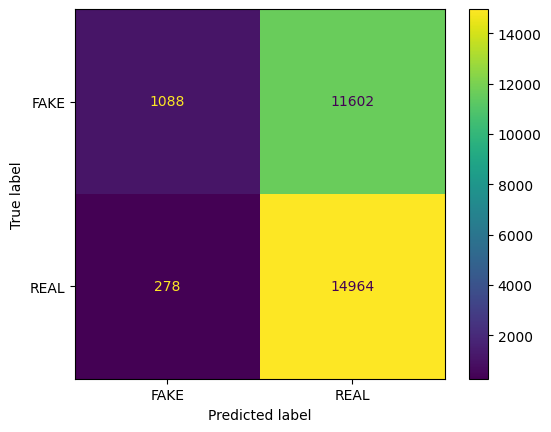

In [ ]:
thr = tuned_prediction_test_news(model_logreg, val, test)

In [ ]:
thr

0.5

# Searching for similiar news

In [ ]:
from sentence_transformers import util

In [ ]:
def find_similiar_news(news_nr, alike_nr):

  selected_news = allnews.sample(news_nr)['news'].reset_index(drop=True)
  selected_emb = model_sentrans.encode(selected_news, convert_to_numpy=True)
  searched_news = allnews['news']
  searched_emb = X_matrix

  cos_dist = util.cos_sim(selected_emb, searched_emb)

  dict_similiar = {}
  for ind1, selected in enumerate(selected_news):
    similiar = []
    for ind2, searched in enumerate(searched_news):
      if searched!=selected:
        similiar.append([cos_dist[ind1,ind2], searched])
    
    similiar = sorted(similiar, key=lambda x: x[0], reverse=True)
    dict_similiar[ind1] = []
    while len(dict_similiar[ind1])<alike_nr:
      if similiar[0][1] not in dict_similiar[ind1]:
        dict_similiar[ind1].append(similiar.pop(0)[1])
      else:
        similiar.pop(0)

  for ind1 in dict_similiar.keys():
    print("\nFor this news:")
    print("==========================================================")
    print(selected_news[ind1])
    print("==========================================================")
    print(f"I've found these {alike_nr} similiar news:")
    print("----------------------------------------------------------")
    for n in range(alike_nr):
      print(f"{n+1}: {dict_similiar[ind1][n]}")
    print("----------------------------------------------------------")

In [ ]:
find_similiar_news(5,5)


For this news:
kendall jenner blake griffin close break
I've found these 5 similiar news:
----------------------------------------------------------
1: kendall jenner blake griffin clash
2: kendall jenner blake griffin meet here know
3: kendall jenner attend premiere beau blake griffin
4: kendall jenner blake griffin inside relationship
5: kendall jenner get animate blake griffin basketball game
----------------------------------------------------------

For this news:
reverse course epa say fracking contaminate drinking water new york time
I've found these 5 similiar news:
----------------------------------------------------------
1: study fracking contaminate groundwater breitbart
2: trump tap climate change skeptic fracking advocate key energy advisor
3: epa chief doubt consensus view climate change new york time
4: coverup toxic water flow faster fact epa
5: oops hypocrite hillary us flint water crisis prop campaignignores major 1992 clinton water pollution scandal
---------------

# Summary

News were transformed using SentenceTransformer model. Obtained vectors were features for training classification model based on Logistic Regression, which hiperparameter was tuned using Optuna. The F1 score achieved 0.72, which was the best result among other trials in this project. Then, based on predicted probabilities, the best threshold separating label to 0 and 1 was found. It turned out to be 0.5, so this attempt didn't improve the result. At the end, using cosine distance in vector space, news similiar to several randomly selected ones were found.